# Predicting Early Readmission in Diabetic Patients With Machine Learning

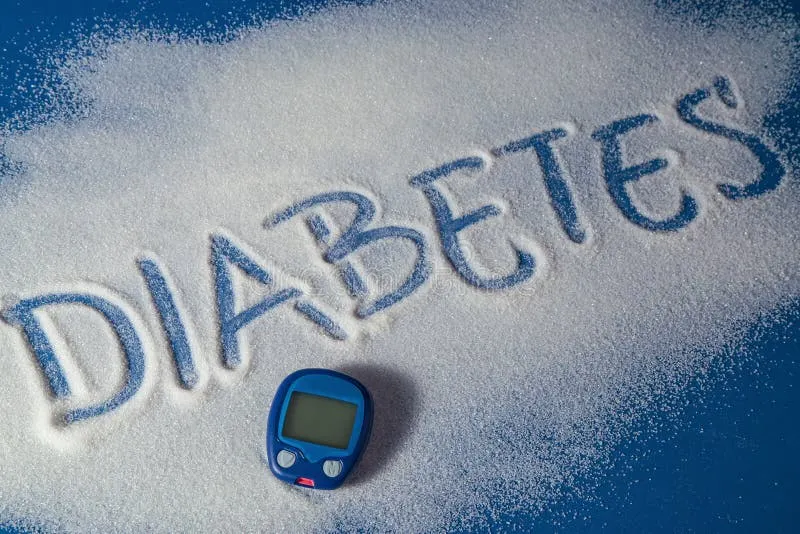

## Project Overview
This project analyzes ten years (1999–2008) of clinical care data from 130 US hospitals and integrated delivery networks. The dataset focuses on diabetic patients who received inpatient care—including lab work, medications, and short hospital stays (up to 14 days). The goal is to predict whether a patient will be readmitted within 30 days of discharge.

## Why This Matters
Think of it like this: If someone with diabetes goes to the hospital and is sent home too early or without the right care, they might get worse and have to come back. That’s bad for their health and expensive for everyone involved.

This research helps us figure out how to prevent that from happening in the first place.

Even though we know how to improve outcomes for diabetic patients, many still don’t receive proper care during their hospital stay. This project aims to highlight patterns in the data that can be used to flag high-risk patients before discharge—so hospitals can intervene early and reduce unnecessary readmissions.

## Objectives
1. Explore and clean real-world hospital data

2. Identify key features influencing early readmission

3. Train and evaluate machine learning models to predict readmission risk

4. Provide insights to help improve diabetic patient care and hospital efficiency

## Dataset
Source: UCI Machine Learning Repository - Diabetes 130-US hospitals dataset:

https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

Size: 100,000+ patient records

Features include demographics, lab tests, medications, diagnosis codes, length of stay, and discharge outcomes

The final model can help hospitals:

Identify patients at risk of early readmission

Improve discharge planning and follow-up care

Reduce healthcare costs and improve patient outcomes


## Chapter One: Obtaining Data For Analysis and Cleaning

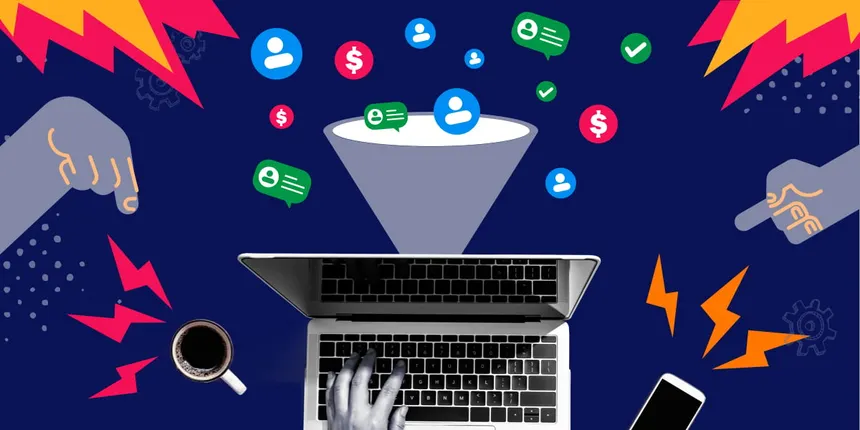

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.shape

(101766, 50)

In [3]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The data could be having "?" as a place filler for null values.

In [5]:
diabetes.apply(lambda col: (col == '?').sum()).sort_values(ascending=False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [6]:
diabetes.replace('?', np.nan, inplace=True)

In [7]:
diabetes.isnull().sum().sort_values(ascending=False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [8]:
diabetes.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)    NaN   
1             149190     55629189        Caucasian  Female  [10-20)    NaN   
2              64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3             500364     82442376        Caucasian    Male  [30-40)    NaN   
4              16680     42519267        Caucasian    Male  [40-50)    NaN   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)    NaN   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)    NaN   
101763     443854148     41088789        Caucasian    Male  [70-80)    NaN   
101764     443857166     31693671        Caucasian  Female  [80-90)    NaN   
101765     443867222    175429310        Caucasian    Male  [70-80)    NaN   

        admission_type_id  di

In [9]:
for col in diabetes.columns:
    if diabetes[col].dtype == 'object':
        unique_vals = diabetes[col].nunique()
        if unique_vals < 20:
            print(f"{col}: {diabetes[col].unique()}")

race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
max_glu_serum: ['None' '>300' 'Norm' '>200']
A1Cresult: ['None' '>7' '>8' 'Norm']
metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 

Since we will be looking at the readmitted column, we can simplify it so that if Readmitted ="<30" we have a 1 if else we have a 0.(Yes or No)

In [10]:
# Binary target: 1 if readmitted within 30 days, else 0
diabetes['readmit_30'] = diabetes['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [11]:
# 1. Drop columns with too many missing values

drop_cols = ["weight", "payer_code"]
diabetes_clean = diabetes.drop(columns=drop_cols)

# 2. Impute missing categorical values
# -------------------------
# For race, diag_2, diag_3 → fill with "Unknown"
diabetes_clean["race"] = diabetes_clean["race"].fillna("Unknown")
diabetes_clean["diag_2"] = diabetes_clean["diag_2"].fillna("Unknown")
diabetes_clean["diag_3"] = diabetes_clean["diag_3"].fillna("Unknown")
diabetes_clean["diag_1"] = diabetes_clean["diag_1"].fillna("Unknown")
diabetes_clean["medical_specialty"] = diabetes_clean["medical_specialty"].fillna("Unknown")

# 3. Double-check

print("Missing values after cleaning:")
print(diabetes_clean.isnull().sum().sort_values(ascending=False).head(10))


Missing values after cleaning:
readmit_30          0
repaglinide         0
A1Cresult           0
max_glu_serum       0
number_diagnoses    0
diag_3              0
diag_2              0
diag_1              0
number_inpatient    0
number_emergency    0
dtype: int64


## Chapter Two: Exploratory Data Analysis

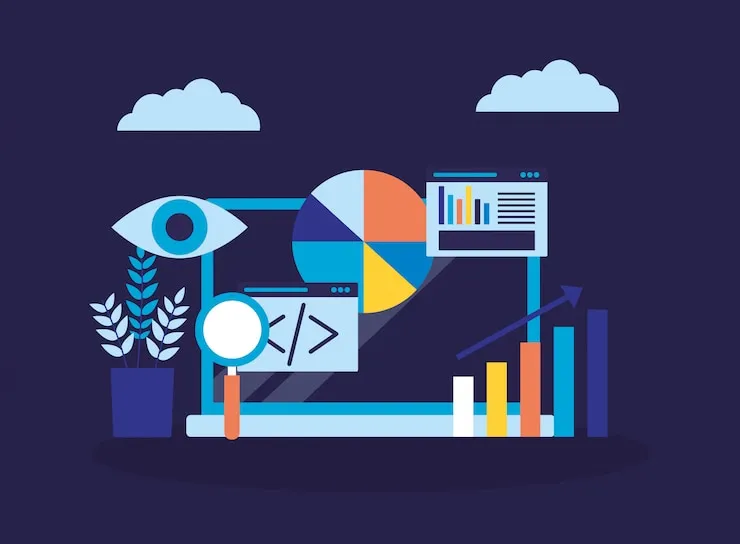

Here we will be trying to understand the structure of our data, discover patterns, relationships and outliers and generate insights and hypotheses before modelling.

#### 1. Target Variable Distribution:
Check for balance of readmissions. Since we're looking at the probability of a readmission, we have to check the general ditribution of the target.

Text(0.5, 1.0, 'Readmission Categories')

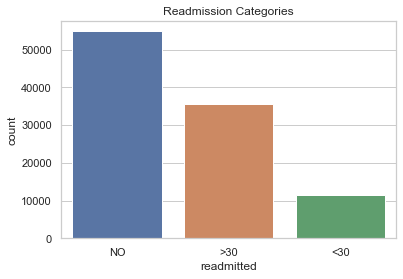

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the distribution of readmission categories
sns.countplot(data=diabetes_clean, x='readmitted')
plt.title('Readmission Categories')

It's good to note the class imbalance. We are aiming to make our prediction model prevent the <30 class from future reoccurence. If our model is trained on this data it would most likely struggle to predict the <30 class .

(101766, 49)


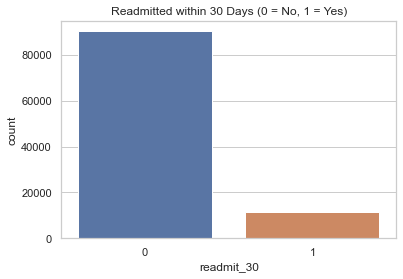

In [13]:
# Visualizing the binary target for readmission within 30 days
sns.countplot(data=diabetes_clean, x='readmit_30')
plt.title('Readmitted within 30 Days (0 = No, 1 = Yes)')
print(diabetes_clean.shape)


In [14]:
diabetes_clean["readmit_30"].nunique()

2

In [15]:
diabetes_clean["readmit_30"].value_counts()

0    90409
1    11357
Name: readmit_30, dtype: int64

In [16]:
diabetes_clean["readmit_30"].value_counts(normalize=True)

0    0.888401
1    0.111599
Name: readmit_30, dtype: float64

🔎 What this means:

We have a class imbalance problem (roughly 9:1).

If you train a model as-is, it might just predict 0 all the time and still look “accurate” (~89% accuracy).

But that model would be useless, because it ignores the important minority class (readmissions).

#### 2. Univariate Analysis

Let us look at key features individually.

<AxesSubplot:title={'center':'Race Distribution'}>

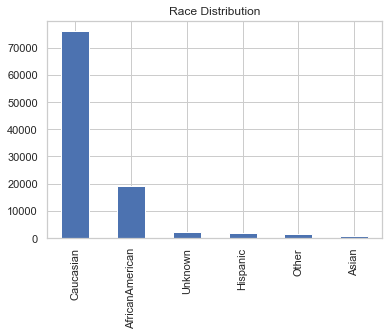

In [17]:
diabetes_clean['race'].value_counts().plot(kind='bar', title='Race Distribution')

In [18]:
diabetes_clean["race"].nunique()

6

In [19]:
diabetes_clean["race"].value_counts(normalize=True)

Caucasian          0.747784
AfricanAmerican    0.188766
Unknown            0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

In [20]:
diabetes_clean["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [21]:
import pandas as pd

# Example race distribution you showed
race_mapping = {
    "Caucasian": "Caucasian",
    "AfricanAmerican": "AfricanAmerican",
    "Unknown": "Unknown",
    "Asian": "Minority_Other",
    "Hispanic": "Minority_Other",
    "Other": "Minority_Other"
}

# Keep original race for fairness evaluation
diabetes_clean["race_original"] = diabetes_clean["race"]

# Create collapsed race feature for training
diabetes_clean["race_collapsed"] = diabetes_clean["race"].map(race_mapping)


<AxesSubplot:title={'center':'Race Distribution'}>

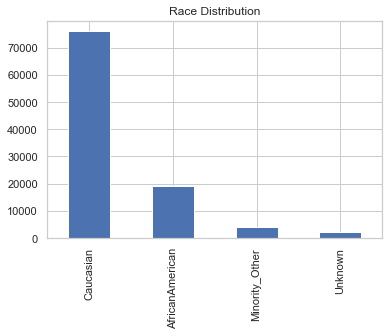

In [22]:
diabetes_clean["race_collapsed"].value_counts().plot(kind='bar', title='Race Distribution')

<AxesSubplot:title={'center':'Admission Types'}>

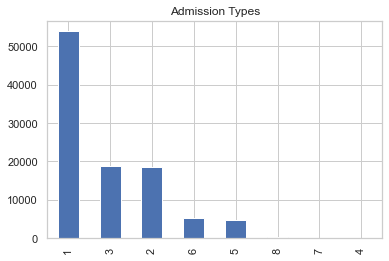

In [23]:
diabetes_clean['admission_type_id'].value_counts().plot(kind='bar', title='Admission Types')

Text(0.5, 1.0, 'Number of Medications')

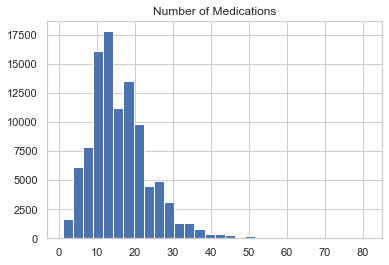

In [24]:
diabetes_clean['num_medications'].hist(bins=30)
plt.title('Number of Medications')

Text(0.5, 1.0, 'Number of Lab Procedures')

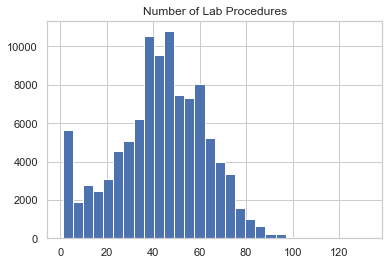

In [25]:
diabetes['num_lab_procedures'].hist(bins=30)
plt.title('Number of Lab Procedures')

Text(0.5, 1.0, 'Readmission by Gender')

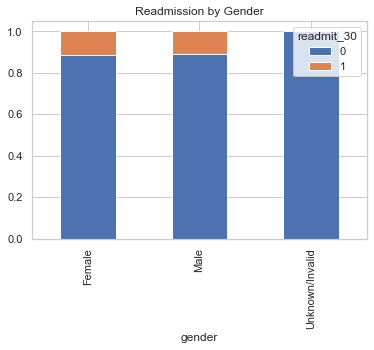

In [26]:
# Categorical features vs target
pd.crosstab(diabetes_clean['gender'], diabetes_clean['readmit_30'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Readmission by Gender')

In [27]:
diabetes_clean['gender'].nunique()

3

In [28]:
diabetes_clean['gender'].value_counts(normalize=True)

Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64

In [29]:
diabetes_clean['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

<AxesSubplot:xlabel='readmit_30', ylabel='num_lab_procedures'>

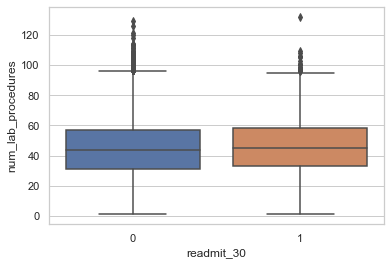

In [30]:
# Numeric features
sns.boxplot(data=diabetes_clean, x='readmit_30', y='num_lab_procedures')

Here’s what it shows:

Medians: Pretty close between the two groups. Patients readmitted (1) have a slightly higher median number of lab procedures than those not readmitted (0).

Spread: Both groups have a similar interquartile range (IQR).

Outliers: Both groups show quite a lot of high outliers (patients with 80+ lab procedures), but they’re more frequent in the readmitted group.

Interpretation:

This suggests that more lab procedures may be weakly correlated with higher readmission, but the distributions overlap heavily.

On its own, num_lab_procedures isn’t a strong discriminator.

It will be more useful when combined with other features in the model (interactions).

<AxesSubplot:>

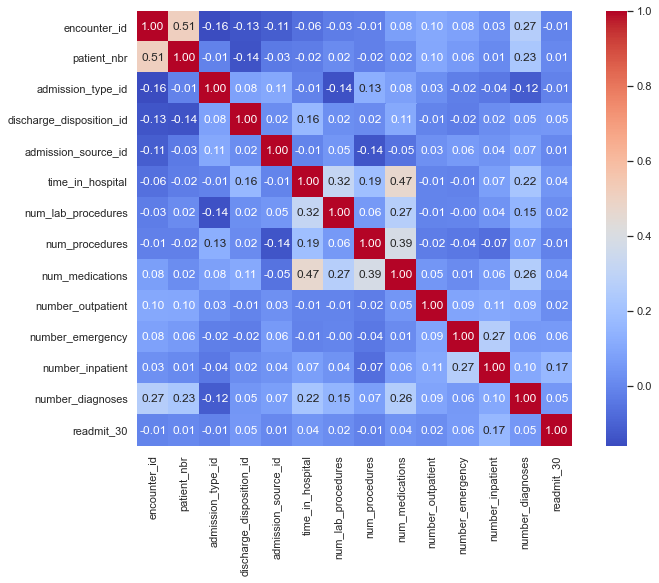

In [31]:
# Correlation matrix
corr_matrix = diabetes_clean.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

### Observations

###### With target (readmit_30)

All correlations are very weak (<0.1).

Slight positive with number_inpatient (0.17) and number_diagnoses (0.05).

Negative/near-zero elsewhere.
👉 Meaning: no single numeric variable strongly predicts readmission on its own.

###### Within features themselves

time_in_hospital ↔ num_medications (0.47) and num_lab_procedures (0.32) → makes sense: longer stay = more meds/procedures.

num_procedures ↔ num_medications (0.39).

number_outpatient ↔ number_inpatient (0.27).
👉 Possible multicollinearity risk in modeling.

Sparse signals

Nothing above ~0.5 correlation, so we’re not at risk of perfectly collinear features.

The dataset’s signal is weak, which is expected — predicting readmission is notoriously hard.

###### What this means 

Don’t rely on single variables → The model will need to combine signals (e.g., demographics + diagnoses + meds).

Feature engineering is key:

Ratios (e.g., procedures per day in hospital).

Aggregates (e.g., “total prior encounters” from patient history).

Interaction terms (e.g., time_in_hospital * number_inpatient).

Categorial variables (like race, admission source, diagnosis codes) might actually hold more predictive power than these numeric ones.

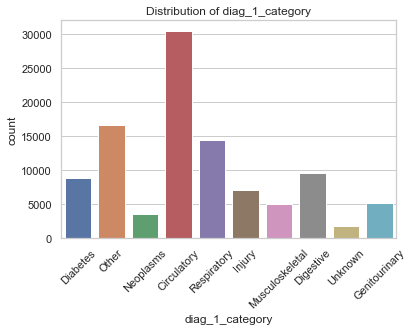

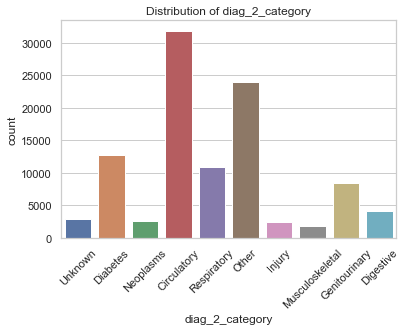

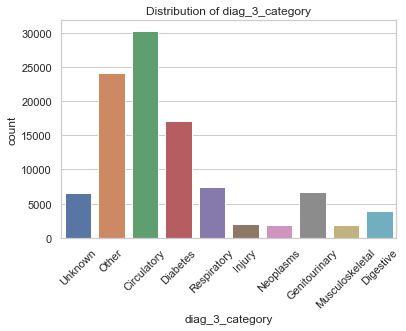

In [32]:
def categorize_diag(code):
    try:
        code = float(code)
        if (390 <= code <= 459) or code == 785:
            return 'Circulatory'
        elif (460 <= code <= 519) or code == 786:
            return 'Respiratory'
        elif (520 <= code <= 579) or code == 787:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif (800 <= code <= 999):
            return 'Injury'
        elif (710 <= code <= 739):
            return 'Musculoskeletal'
        elif (580 <= code <= 629) or code == 788:
            return 'Genitourinary'
        elif (140 <= code <= 239):
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetes_clean[col + '_category'] = diabetes_clean[col].apply(categorize_diag)
# Visualizing the distribution of diagnosis categories
for col in ['diag_1_category', 'diag_2_category', 'diag_3_category']:
    sns.countplot(data=diabetes_clean, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
numeric_cols = diabetes_clean.select_dtypes(include='number')
# Calculate correlation with 'readmit_30'
correlation = numeric_cols.corr()['readmit_30'].sort_values(ascending=False)
print(correlation)

readmit_30                  1.000000
number_inpatient            0.165147
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
num_lab_procedures          0.020364
number_outpatient           0.018893
patient_nbr                 0.007893
admission_source_id         0.005820
encounter_id               -0.008519
admission_type_id          -0.011651
num_procedures             -0.012227
Name: readmit_30, dtype: float64


In [34]:
diabetes_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_30', 'race_original', 'race_collapsed', 'diag_1_category',
       'diag_2_category', 'diag_3_categor

## Chapter Three: Feature Engineering

In [35]:
import pandas as pd
import numpy as np

# Copy df to avoid modifying original
df = diabetes_clean.copy()

# =========================
# 1. Patient history
# =========================
# Encounter count per patient
encounter_counts = df.groupby('patient_nbr')['encounter_id'].count().rename('encounter_count')
df = df.merge(encounter_counts, on='patient_nbr', how='left')

# =========================
# 2. Demographics
# =========================
# Age bins → midpoints
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
df['age_num'] = df['age'].map(age_map)

# Senior flag
df['is_senior'] = (df['age_num'] >= 65).astype(int)

# =========================
# 3. Admission / Discharge
# =========================
# Simplify admission_type
df['admission_type_simplified'] = df['admission_type_id'].replace({
    1: 'Emergency', 2: 'Urgent', 3: 'Elective', 4: 'Newborn'
}).fillna('Other')

# Discharge flags
df['discharged_home'] = (df['discharge_disposition_id'] == 1).astype(int)
df['left_against_advice'] = (df['discharge_disposition_id'] == 7).astype(int)
df['died'] = df['discharge_disposition_id'].isin([11, 19, 20, 21]).astype(int)

# Admission source simplified
df['admission_source_simplified'] = df['admission_source_id'].replace({
    1: 'Physician Referral', 2: 'Clinic Referral', 7: 'Emergency Room',
    9: 'Other'
}).fillna('Other')

# =========================
# 4. Hospitalization / Utilization
# =========================
df['long_stay'] = (df['time_in_hospital'] > 7).astype(int)
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df['prior_emergency_flag'] = (df['number_emergency'] > 0).astype(int)

# =========================
# 5. Diagnostics
# =========================
# Chronic condition count from diag categories
chronic_conditions = ['Circulatory', 'Respiratory', 'Diabetes', 'Hypertension']
df['chronic_condition_count'] = df[['diag_1_category','diag_2_category','diag_3_category']].apply(
    lambda row: sum([d in chronic_conditions for d in row]), axis=1
)

# =========================
# 6. Labs & Medications
# =========================
df['polypharmacy_flag'] = (df['num_medications'] > 10).astype(int)
df['labs_per_day'] = df['num_lab_procedures'] / df['time_in_hospital']
df['meds_per_day'] = df['num_medications'] / df['time_in_hospital']

# =========================
# 7. Lab Results
# =========================
glu_map = { 'None': -1, 'Norm': 0, '>200': 2, '>300': 3 }
a1c_map = { 'None': -1, 'Norm': 0, '>7': 1, '>8': 2 }

df['max_glu_serum_num'] = df['max_glu_serum'].map(glu_map)
df['A1Cresult_num'] = df['A1Cresult'].map(a1c_map)

df['poor_glucose_control'] = ((df['A1Cresult_num'] >= 1) | (df['max_glu_serum_num'] >= 2)).astype(int)

# =========================
# 8. Medications (collapse)
# =========================
med_cols = [
    'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
    'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
    'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
    'examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
    'metformin-pioglitazone'
]

# Binary drug usage (Yes/No vs. No)
df['drug_count'] = (df[med_cols] != 'No').sum(axis=1)
df['insulin_flag'] = (df['insulin'] != 'No').astype(int)
df['combination_therapy_flag'] = df[med_cols].apply(lambda row: sum(x.find('-')!=-1 and x!='No' for x in row), axis=1)
df['changed_medications'] = (df['change'] == 'Ch').astype(int)

# =========================
# Done ✅
# =========================
print("Engineered dataset shape:", df.shape)
df.head()


Engineered dataset shape: (101766, 76)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_30,race_original,race_collapsed,diag_1_category,diag_2_category,diag_3_category,encounter_count,age_num,is_senior,admission_type_simplified,discharged_home,left_against_advice,died,admission_source_simplified,long_stay,total_visits,prior_emergency_flag,chronic_condition_count,polypharmacy_flag,labs_per_day,meds_per_day,max_glu_serum_num,A1Cresult_num,poor_glucose_control,drug_count,insulin_flag,combination_therapy_flag,changed_medications
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,Caucasian,Caucasian,Diabetes,Unknown,Unknown,1,5,0,6,0,0,0,Physician Referral,0,0,0,1,0,41.000000,1.0,-1,-1,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,Caucasian,Caucasian,Other,Diabetes,Other,1,15,0,Emergency,1,0,0,Emergency Room,0,0,0,1,1,19.666667,6.0,-1,-1,0,1,1,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,AfricanAmerican,AfricanAmerican,Other,Diabetes,Unknown,1,25,0,Emergency,1,0,0,Emergency Room,0,3,0,1,1,5.500000,6.5,-1,-1,0,1,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,Caucasian,Caucasian,Other,Diabetes,Circulatory,1,35,0,Emergency,1,0,0,Emergency Room,0,0,0,2,1,22.000000,8.0,-1,-1,0,1,1,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,Caucasian,Caucasian,Neoplasms,Neoplasms,Diabetes,1,45,0,Emergency,1,0,0,Emergency Room,0,0,0,1,0,51.000000,8.0,-1,-1,0,2,1,0,1


In [36]:
# =========================
#  Admission / Discharge Mapping
# =========================

# --- Admission Type ---
admission_type_map = {
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Not Available",
    6: "Unknown",
    7: "Trauma Center",
    8: "Not Mapped"
}
df["admission_type_desc"] = df["admission_type_id"].map(admission_type_map).fillna("Other")

# Simplify: Emergency vs Elective vs Other
df["admission_type_simplified"] = df["admission_type_desc"].replace({
    "Emergency": "Emergency",
    "Urgent": "Emergency",
    "Trauma Center": "Emergency",
    "Elective": "Elective"
}).fillna("Other")

# --- Discharge Disposition ---
discharge_map = {
    1: "Discharged to home",
    6: "Home with health service",
    7: "Left AMA",
    11: "Expired",
    13: "Hospice/home",
    14: "Hospice/facility",
    19: "Expired home hospice",
    20: "Expired medical hospice",
    21: "Expired unknown hospice"
}
df["discharge_desc"] = df["discharge_disposition_id"].map(discharge_map).fillna("Other")

# Useful binary flags
df["discharged_home"] = (df["discharge_disposition_id"] == 1).astype(int)
df["home_with_health_service"] = (df["discharge_disposition_id"] == 6).astype(int)
df["left_against_advice"] = (df["discharge_disposition_id"] == 7).astype(int)
df["died"] = df["discharge_disposition_id"].isin([11, 19, 20, 21]).astype(int)
df["hospice"] = df["discharge_disposition_id"].isin([13,14]).astype(int)

# --- Admission Source ---
admission_source_map = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from Hospital",
    5: "Transfer from SNF",
    6: "Transfer from other facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    10: "Critical Access Hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    18: "Other Home Health Agency",
    19: "Readmission to same Home Health Agency",
    22: "Same facility re-admission",
    23: "Born inside hospital",
    24: "Born outside hospital",
    25: "Ambulatory Surgery Center",
    26: "From Hospice"
}
df["admission_source_desc"] = df["admission_source_id"].map(admission_source_map).fillna("Other")

# Simplify: ER vs Referral vs Transfer vs Other
df["admission_source_simplified"] = df["admission_source_desc"].replace({
    "Emergency Room": "ER",
    "Physician Referral": "Referral",
    "Clinic Referral": "Referral",
    "HMO Referral": "Referral",
    "Transfer from Hospital": "Transfer",
    "Transfer from SNF": "Transfer",
    "Transfer from other facility": "Transfer"
}).fillna("Other")


In [37]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_30', 'race_original', 'race_collapsed', 'diag_1_category',
       'diag_2_category', 'diag_3_categor

In [38]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# pick categorical columns (object or category dtype)
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# compute correlations with readmit_30
results = {}
for col in cat_cols:
    if col != "readmit_30":
        try:
            results[col] = cramers_v(df[col], df["readmit_30"])
        except:
            results[col] = np.nan

corr_df = pd.DataFrame.from_dict(results, orient="index", columns=["CramersV"]).sort_values("CramersV", ascending=False)
print(corr_df)

<ipython-input-38-d8def2ac4cf6>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-38-d8def2ac4cf6>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


                             CramersV
readmitted                   0.999995
diag_1                       0.102293
discharge_desc               0.097844
diag_3                       0.087043
diag_2                       0.078604
medical_specialty            0.051849
insulin                      0.042965
diag_1_category              0.035118
age                          0.032518
diag_3_category              0.028571
diabetesMed                  0.026906
metformin                    0.023406
diag_2_category              0.020585
change                       0.019221
admission_source_desc        0.019081
A1Cresult                    0.017950
admission_source_simplified  0.017798
race_collapsed               0.014828
race_original                0.014334
race                         0.014334
admission_type_desc          0.013898
admission_type_simplified    0.013022
max_glu_serum                0.011211
repaglinide                  0.009419
glipizide                    0.009144
glimepiride 

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v_and_p(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return cramers_v, p

# Pick categorical columns (object or category dtype)
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Compute correlation + p-value with readmit_30
results = []
for col in cat_cols:
    if col != "readmit_30":
        try:
            cv, p = cramers_v_and_p(df[col], df["readmit_30"])
            results.append((col, cv, p))
        except:
            results.append((col, np.nan, np.nan))

# Convert to dataframe
corr_df = pd.DataFrame(results, columns=["Feature", "CramersV", "p_value"])
corr_df = corr_df.sort_values("CramersV", ascending=False).reset_index(drop=True)

print(corr_df)


<ipython-input-39-2f7618517034>:14: RuntimeWarning: invalid value encountered in double_scalars
  cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-39-2f7618517034>:14: RuntimeWarning: invalid value encountered in double_scalars
  cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


                        Feature  CramersV        p_value
0                    readmitted  0.999995   0.000000e+00
1                        diag_1  0.102293   3.849481e-92
2                discharge_desc  0.097844  1.013628e-206
3                        diag_3  0.087043   4.760052e-53
4                        diag_2  0.078604   8.814029e-40
5             medical_specialty  0.051849   2.265231e-37
6                       insulin  0.042965   3.981889e-41
7               diag_1_category  0.035118   1.402821e-24
8                           age  0.032518   6.597923e-21
9               diag_3_category  0.028571   6.249004e-16
10                  diabetesMed  0.026906   5.565116e-18
11                    metformin  0.023406   1.085303e-12
12              diag_2_category  0.020585   4.288273e-08
13                       change  0.019221   5.212417e-10
14        admission_source_desc  0.019081   4.065426e-06
15                    A1Cresult  0.017950   8.294910e-08
16  admission_source_simplified

In [40]:
significant = corr_df[corr_df["p_value"] < 0.05]

In [41]:
significant.head(30)

,Feature,CramersV,p_value
0,readmitted,0.999995,0.000000e+00
1,diag_1,0.102293,3.849481e-92
2,discharge_desc,0.097844,1.013628e-206
3,diag_3,0.087043,4.760052e-53
4,diag_2,0.078604,8.814029e-40
5,medical_specialty,0.051849,2.265231e-37
6,insulin,0.042965,3.981889e-41
7,diag_1_category,0.035118,1.402821e-24
8,age,0.032518,6.597923e-21
9,diag_3_category,0.028571,6.249004e-16


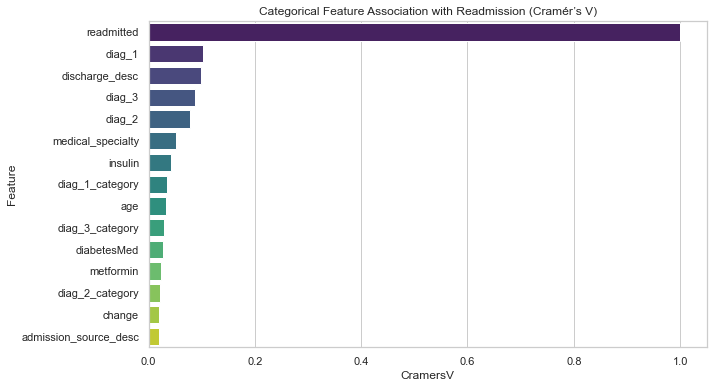

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x="CramersV", 
    y="Feature", 
    data=corr_df.sort_values("CramersV", ascending=False).head(15),
    palette="viridis"
)
plt.title("Categorical Feature Association with Readmission (Cramér’s V)")
plt.show()

In [43]:
# Target
target = "readmit_30"

# Selected categorical features
cat_features = [
    "diag_1", "diag_2", "diag_3",
    "discharge_desc", "medical_specialty",
    "insulin", "diabetesMed", "metformin",
    "change", "A1Cresult",
    "admission_source_desc", "admission_type_desc",
    "race_collapsed"
]

# Selected numerical features
num_features = [
    "time_in_hospital", "num_lab_procedures", "num_procedures",
    "num_medications", "number_outpatient", "number_emergency",
    "number_inpatient", "number_diagnoses",
    "age_num", "is_senior", "encounter_count", "long_stay",
    "total_visits", "prior_emergency_flag", "chronic_condition_count",
    "polypharmacy_flag", "labs_per_day", "meds_per_day",
    "poor_glucose_control", "drug_count", "insulin_flag",
    "combination_therapy_flag", "changed_medications"
]

# Final feature set
selected_features = cat_features + num_features

df_model = df[selected_features + [target]].copy()

print("Final shape:", df_model.shape)
df_model.head()


Final shape: (101766, 37)


,diag_1,diag_2,diag_3,discharge_desc,medical_specialty,insulin,diabetesMed,metformin,change,A1Cresult,admission_source_desc,admission_type_desc,race_collapsed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_num,is_senior,encounter_count,long_stay,total_visits,prior_emergency_flag,chronic_condition_count,polypharmacy_flag,labs_per_day,meds_per_day,poor_glucose_control,drug_count,insulin_flag,combination_therapy_flag,changed_medications,readmit_30
0,250.83,Unknown,Unknown,Other,Pediatrics-Endocrinology,No,No,No,No,None,Physician Referral,Unknown,Caucasian,1,41,0,1,0,0,0,1,5,0,1,0,0,0,1,0,41.000000,1.0,0,0,0,0,0,0
1,276,250.01,255,Discharged to home,Unknown,Up,Yes,No,Ch,None,Emergency Room,Emergency,Caucasian,3,59,0,18,0,0,0,9,15,0,1,0,0,0,1,1,19.666667,6.0,0,1,1,0,1,0
2,648,250,V27,Discharged to home,Unknown,No,Yes,No,No,None,Emergency Room,Emergency,AfricanAmerican,2,11,5,13,2,0,1,6,25,0,1,0,3,0,1,1,5.500000,6.5,0,1,0,0,0,0
3,8,250.43,403,Discharged to home,Unknown,Up,Yes,No,Ch,None,Emergency Room,Emergency,Caucasian,2,44,1,16,0,0,0,7,35,0,1,0,0,0,2,1,22.000000,8.0,0,1,1,0,1,0
4,197,157,250,Discharged to home,Unknown,Steady,Yes,No,Ch,None,Emergency Room,Emergency,Caucasian,1,51,0,8,0,0,0,5,45,0,1,0,0,0,1,0,51.000000,8.0,0,2,1,0,1,0


In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
import pandas as pd
import numpy as np
import time

# ---------------------------
# 1. TRAIN/VALIDATION/TEST SPLITS
# ---------------------------
print("🔄 Creating train/validation/test splits...")

# Features & Target
X = df_model.drop(columns=["readmit_30"])
y = df_model["readmit_30"]

# Auto-detect feature types
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"📋 Feature Summary:")
print(f"   Categorical features: {len(categorical)}")
print(f"   Numeric features: {len(numeric)}")

# 70/15/15 split with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"✅ Data splits created:")
print(f"   Training: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validation: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Test: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")


🔄 Creating train/validation/test splits...
📋 Feature Summary:
   Categorical features: 13
   Numeric features: 16
✅ Data splits created:
   Training: 71,236 samples (70.0%)
   Validation: 15,265 samples (15.0%)
   Test: 15,265 samples (15.0%)


In [45]:
# 2. SPEED OPTIMIZATIONS
# ---------------------------

# Handle high-cardinality categoricals
def limit_categories(df, categorical_cols, max_categories=15):
    """Limit high-cardinality features to top N categories"""
    df_limited = df.copy()
    
    for col in categorical_cols:
        if df[col].nunique() > max_categories:
            # Keep top categories by frequency
            top_cats = df[col].value_counts().head(max_categories-1).index.tolist()
            df_limited[col] = df[col].apply(lambda x: x if x in top_cats else 'Other')
            print(f"Limited {col}: {df_limited[col].nunique()} categories (was {df[col].nunique()})")
    
    return df_limited

# Check cardinality first
print("\n🔍 Checking categorical feature cardinality:")
for col in categorical:
    unique_count = X_train[col].nunique()
    print(f"   {col}: {unique_count} unique values")
    if unique_count > 50:
        print(f"      ⚠️  HIGH CARDINALITY!")

# Apply category limiting to training data
X_train_limited = limit_categories(X_train, categorical, max_categories=15)


🔍 Checking categorical feature cardinality:
   diag_1: 681 unique values
      ⚠️  HIGH CARDINALITY!
   diag_2: 697 unique values
      ⚠️  HIGH CARDINALITY!
   diag_3: 745 unique values
      ⚠️  HIGH CARDINALITY!
   discharge_desc: 9 unique values
   medical_specialty: 70 unique values
      ⚠️  HIGH CARDINALITY!
   insulin: 4 unique values
   diabetesMed: 2 unique values
   metformin: 4 unique values
   change: 2 unique values
   A1Cresult: 4 unique values
   admission_source_desc: 14 unique values
   admission_type_desc: 8 unique values
   race_collapsed: 4 unique values
Limited diag_1: 15 categories (was 681)
Limited diag_2: 15 categories (was 697)
Limited diag_3: 15 categories (was 745)
Limited medical_specialty: 15 categories (was 70)


In [46]:
# 3. MANUAL OVERSAMPLING (No imblearn needed)
# ---------------------------

def simple_oversample(X, y, random_state=42):
    """Simple random oversampling without imblearn"""
    np.random.seed(random_state)
    
    # Get class counts
    class_counts = y.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    majority_count = class_counts[majority_class]
    minority_count = class_counts[minority_class]
    
    print(f"   Original class distribution: {dict(class_counts)}")
    
    # Separate classes
    majority_indices = y[y == majority_class].index
    minority_indices = y[y == minority_class].index
    
    # Oversample minority class
    oversample_size = majority_count - minority_count
    minority_oversampled = np.random.choice(minority_indices, size=oversample_size, replace=True)
    
    # Combine all indices
    all_indices = list(majority_indices) + list(minority_indices) + list(minority_oversampled)
    
    # Return oversampled data
    X_resampled = X.loc[all_indices]
    y_resampled = y.loc[all_indices]
    
    print(f"   Resampled class distribution: {dict(y_resampled.value_counts())}")
    
    return X_resampled, y_resampled

In [47]:
# 4. PREPROCESSING PIPELINE
# ---------------------------

# Faster transformers
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(
        handle_unknown="ignore", 
        sparse_output=False,
        max_categories=15,
        drop='if_binary'
    ))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical),
        ("numeric", numeric_transformer, numeric)
    ]
)

In [48]:
# 5. TRAINING PIPELINE
# ---------------------------

print("\n🚀 Starting optimized training...")

# Test on sample first
print("Testing on 5K sample...")
start_time = time.time()

sample_indices = X_train_limited.sample(n=5000, random_state=42).index
X_sample = X_train_limited.loc[sample_indices]
y_sample = y_train.loc[sample_indices]

# Fit preprocessor on sample
X_sample_processed = preprocessor.fit_transform(X_sample)
sample_time = time.time() - start_time

print(f"✅ Sample preprocessing completed in {sample_time:.1f} seconds")
print(f"📊 Final feature count: {X_sample_processed.shape[1]}")

# Now train on full dataset
print(f"\n🎯 Training on full dataset ({len(X_train_limited):,} rows)...")
start_time = time.time()

# Preprocess full training data
X_train_processed = preprocessor.fit_transform(X_train_limited)

# Apply oversampling
print("Applying oversampling...")
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.index = X_train_limited.index
X_train_resampled, y_train_resampled = simple_oversample(X_train_df, y_train)

# Train model
model = LogisticRegression(
    solver='liblinear',
    max_iter=200,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)
full_time = time.time() - start_time

print(f"✅ Full training completed in {full_time:.1f} seconds!")


🚀 Starting optimized training...
Testing on 5K sample...
✅ Sample preprocessing completed in 0.2 seconds
📊 Final feature count: 117

🎯 Training on full dataset (71,236 rows)...
Applying oversampling...
   Original class distribution: {0: 63286, 1: 7950}
   Resampled class distribution: {1: 63286, 0: 63286}


C:\Users\PapaDay\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


✅ Full training completed in 6.6 seconds!


In [49]:
# 6. MODEL EVALUATION
# ---------------------------
from sklearn.metrics import classification_report, roc_auc_score

print("\n📊 MODEL EVALUATION")
print("="*50)

# Validation predictions
print("Evaluating on validation set...")
X_val_processed = preprocessor.transform(X_val)
y_val_pred = model.predict(X_val_processed)
y_val_proba = model.predict_proba(X_val_processed)[:, 1]

val_auc = roc_auc_score(y_val, y_val_proba)
val_accuracy = model.score(X_val_processed, y_val)

print(f"📈 Validation Results:")
print(f"   ROC-AUC: {val_auc:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"\n📋 Classification Report:")
print(classification_report(y_val, y_val_pred, digits=3))

# Test set evaluation
print(f"\n🎯 Final Test Set Evaluation:")
X_test_processed = preprocessor.transform(X_test)
y_test_pred = model.predict(X_test_processed)
y_test_proba = model.predict_proba(X_test_processed)[:, 1]

test_auc = roc_auc_score(y_test, y_test_proba)
test_accuracy = model.score(X_test_processed, y_test)

print(f"   ROC-AUC: {test_auc:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"\n📋 Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=3))


📊 MODEL EVALUATION
Evaluating on validation set...
📈 Validation Results:
   ROC-AUC: 0.7436
   Accuracy: 0.7252

📋 Classification Report:


C:\Users\PapaDay\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0      0.936     0.741     0.827     13561
           1      0.225     0.599     0.327      1704

    accuracy                          0.725     15265
   macro avg      0.581     0.670     0.577     15265
weighted avg      0.857     0.725     0.772     15265


🎯 Final Test Set Evaluation:
   ROC-AUC: 0.7324
   Accuracy: 0.7234

📋 Test Classification Report:
              precision    recall  f1-score   support

           0      0.936     0.739     0.826     13562
           1      0.223     0.597     0.325      1703

    accuracy                          0.723     15265
   macro avg      0.580     0.668     0.576     15265
weighted avg      0.856     0.723     0.770     15265



C:\Users\PapaDay\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2, 4, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [50]:
# 7. MODEL INSIGHTS
# ---------------------------
print(f"\n🧠 MODEL INSIGHTS")
print("="*50)

# Get feature names after preprocessing
try:
    categorical_features = list(preprocessor.named_transformers_['categorical']
                               .named_steps['onehot'].get_feature_names_out(categorical))
    feature_names = categorical_features + numeric
    
    # Get coefficients
    coefficients = model.coef_[0]
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=False)
    
    print("🔝 Top 10 Most Important Features:")
    print(feature_importance.head(10)[['feature', 'coefficient']].to_string(index=False))
    
except Exception as e:
    print(f"Feature importance extraction failed: {e}")
    print("Showing model coefficients directly:")
    print(f"Number of features: {len(model.coef_[0])}")
    print(f"Top 5 coefficient magnitudes: {sorted(np.abs(model.coef_[0]), reverse=True)[:5]}")

# Class distribution analysis
print(f"\n📊 Class Distribution Analysis:")
print(f"   Original training: {dict(y_train.value_counts())}")
print(f"   After resampling: {dict(y_train_resampled.value_counts())}")
print(f"   Original imbalance ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]:.1f}:1")

# Performance summary
print(f"\n🎯 Performance Summary:")
print(f"   Validation ROC-AUC: {val_auc:.4f}")
print(f"   Test ROC-AUC: {test_auc:.4f}")
print(f"   Readmission Recall: {classification_report(y_test, y_test_pred, output_dict=True)['1']['recall']:.3f}")
print(f"   Readmission Precision: {classification_report(y_test, y_test_pred, output_dict=True)['1']['precision']:.3f}")

print(f"\n🏁 TRAINING SUMMARY:")
print(f"   Total training time: {full_time:.1f} seconds")
print(f"   Final feature count: {X_train_processed.shape[1]}")
print(f"   Model ready for deployment! 🚀")


🧠 MODEL INSIGHTS
🔝 Top 10 Most Important Features:
                                          feature  coefficient
                           discharge_desc_Expired    -4.619248
                admission_type_desc_Trauma Center    -1.822907
                             discharge_desc_Other     1.316782
                          discharge_desc_Left AMA     1.242924
 admission_source_desc_Same facility re-admission    -1.110907
          discharge_desc_Home with health service     0.931211
   admission_source_desc_Critical Access Hospital    -0.866257
                discharge_desc_Discharged to home     0.773670
                                  encounter_count     0.739421
                  discharge_desc_Hospice/facility     0.698466

📊 Class Distribution Analysis:
   Original training: {0: 63286, 1: 7950}
   After resampling: {1: 63286, 0: 63286}
   Original imbalance ratio: 8.0:1

🎯 Performance Summary:
   Validation ROC-AUC: 0.7436
   Test ROC-AUC: 0.7324
   Readmission Recall: 0.5

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import time
import pandas as pd
import numpy as np

# ---------------------------
# MODEL DEFINITIONS
# ---------------------------
models = {
    'Logistic Regression': LogisticRegression(
        solver='liblinear', 
        max_iter=200, 
        class_weight="balanced",
        random_state=42
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,  # Prevent overfitting
        min_samples_split=100,  # Speed up training
        min_samples_leaf=50,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        min_samples_split=100,
        min_samples_leaf=50,
        random_state=42
    ),
    
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=100,
        min_samples_leaf=50,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ),
    
    'Single Decision Tree': DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=200,
        min_samples_leaf=100,
        class_weight="balanced",
        random_state=42
    )
}

# ---------------------------
# TRAINING AND EVALUATION
# ---------------------------
print("🌳 TREE MODELS VS LOGISTIC REGRESSION COMPARISON")
print("="*70)

results = []

for model_name, model in models.items():
    print(f"\n🔄 Training {model_name}...")
    
    start_time = time.time()
    
    # For tree models, we don't need oversampling (they handle imbalance well)
    if 'Tree' in model_name or 'Forest' in model_name or 'Boosting' in model_name:
        # Use original training data (no oversampling)
        model.fit(X_train_processed, y_train)
        training_data = "Original (no oversampling)"
    else:
        # Use oversampled data for logistic regression
        model.fit(X_train_resampled, y_train_resampled)
        training_data = "Oversampled"
    
    training_time = time.time() - start_time
    
    # Validation predictions
    y_val_pred = model.predict(X_val_processed)
    y_val_proba = model.predict_proba(X_val_processed)[:, 1]
    
    # Test predictions
    y_test_pred = model.predict(X_test_processed)
    y_test_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    val_auc = roc_auc_score(y_val, y_val_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)
    val_accuracy = model.score(X_val_processed, y_val)
    test_accuracy = model.score(X_test_processed, y_test)
    
    # Get detailed metrics for readmission class (class 1)
    val_report = classification_report(y_val, y_val_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    val_precision_1 = val_report['1']['precision']
    val_recall_1 = val_report['1']['recall']
    val_f1_1 = val_report['1']['f1-score']
    
    test_precision_1 = test_report['1']['precision']
    test_recall_1 = test_report['1']['recall']
    test_f1_1 = test_report['1']['f1-score']
    
    # Store results
    results.append({
        'Model': model_name,
        'Training_Time': training_time,
        'Training_Data': training_data,
        'Val_ROC_AUC': val_auc,
        'Test_ROC_AUC': test_auc,
        'Val_Accuracy': val_accuracy,
        'Test_Accuracy': test_accuracy,
        'Val_Precision_Readmit': val_precision_1,
        'Val_Recall_Readmit': val_recall_1,
        'Val_F1_Readmit': val_f1_1,
        'Test_Precision_Readmit': test_precision_1,
        'Test_Recall_Readmit': test_recall_1,
        'Test_F1_Readmit': test_f1_1
    })
    
    print(f"   ✅ Training time: {training_time:.1f}s")
    print(f"   📊 Test ROC-AUC: {test_auc:.4f}")
    print(f"   🎯 Readmission Recall: {test_recall_1:.3f}")

# ---------------------------
# RESULTS SUMMARY
# ---------------------------
results_df = pd.DataFrame(results)

print(f"\n📊 COMPREHENSIVE RESULTS COMPARISON")
print("="*70)

# Sort by Test ROC-AUC
results_df_sorted = results_df.sort_values('Test_ROC_AUC', ascending=False)

print("\n🏆 RANKING BY TEST ROC-AUC:")
for i, (_, row) in enumerate(results_df_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Test_ROC_AUC']:.4f}")

print(f"\n📈 DETAILED PERFORMANCE METRICS:")
print(f"{'Model':<20} {'Test_AUC':<10} {'Test_Acc':<10} {'Readmit_Recall':<15} {'Readmit_Prec':<15} {'Time(s)':<10}")
print("-" * 85)

for _, row in results_df_sorted.iterrows():
    print(f"{row['Model']:<20} {row['Test_ROC_AUC']:<10.4f} {row['Test_Accuracy']:<10.3f} "
          f"{row['Test_Recall_Readmit']:<15.3f} {row['Test_Precision_Readmit']:<15.3f} {row['Training_Time']:<10.1f}")

# ---------------------------
# FEATURE IMPORTANCE (for tree models)
# ---------------------------
print(f"\n🧠 FEATURE IMPORTANCE (Top Model)")
print("="*50)

best_model_name = results_df_sorted.iloc[0]['Model']
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    # Get feature names (simplified version)
    try:
        categorical_features = list(preprocessor.named_transformers_['categorical']
                                   .named_steps['onehot'].get_feature_names_out(categorical))
        feature_names = categorical_features + numeric
    except:
        # Fallback if feature names can't be extracted
        feature_names = [f'feature_{i}' for i in range(len(best_model.feature_importances_))]
    
    feature_importance = pd.DataFrame({
        'feature': feature_names[:len(best_model.feature_importances_)],
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"🔝 Top 10 Features for {best_model_name}:")
    print(feature_importance.head(10)[['feature', 'importance']].to_string(index=False))
else:
    print(f"{best_model_name} doesn't provide feature importance")

# ---------------------------
# RECOMMENDATIONS
# ---------------------------
print(f"\n🎯 RECOMMENDATIONS")
print("="*50)

best_auc = results_df_sorted.iloc[0]['Test_ROC_AUC']
logistic_auc = results_df[results_df['Model'] == 'Logistic Regression']['Test_ROC_AUC'].iloc[0]
improvement = best_auc - logistic_auc

if improvement > 0.01:
    print(f"✅ {best_model_name} shows significant improvement!")
    print(f"   ROC-AUC improvement: +{improvement:.4f}")
    print(f"   Recommendation: Switch to {best_model_name}")
else:
    print(f"⚖️  Models perform similarly (difference < 0.01)")
    print(f"   Recommendation: Stick with Logistic Regression for interpretability")

# Speed vs Performance tradeoff
fastest_model = results_df.loc[results_df['Training_Time'].idxmin()]
print(f"\n⚡ Fastest model: {fastest_model['Model']} ({fastest_model['Training_Time']:.1f}s)")
print(f"🎯 Best performance: {best_model_name} ({best_auc:.4f} ROC-AUC)")

print(f"\n🏁 ANALYSIS COMPLETE!")

🌳 TREE MODELS VS LOGISTIC REGRESSION COMPARISON

🔄 Training Logistic Regression...
   ✅ Training time: 5.3s
   📊 Test ROC-AUC: 0.7324
   🎯 Readmission Recall: 0.597

🔄 Training Random Forest...
   ✅ Training time: 6.9s
   📊 Test ROC-AUC: 0.7602
   🎯 Readmission Recall: 0.780

🔄 Training Gradient Boosting...
   ✅ Training time: 113.6s
   📊 Test ROC-AUC: 0.7850
   🎯 Readmission Recall: 0.011

🔄 Training Extra Trees...
   ✅ Training time: 10.8s
   📊 Test ROC-AUC: 0.7026
   🎯 Readmission Recall: 0.622

🔄 Training Single Decision Tree...
   ✅ Training time: 1.5s
   📊 Test ROC-AUC: 0.7690
   🎯 Readmission Recall: 0.753

📊 COMPREHENSIVE RESULTS COMPARISON

🏆 RANKING BY TEST ROC-AUC:
1. Gradient Boosting: 0.7850
2. Single Decision Tree: 0.7690
3. Random Forest: 0.7602
4. Logistic Regression: 0.7324
5. Extra Trees: 0.7026

📈 DETAILED PERFORMANCE METRICS:
Model                Test_AUC   Test_Acc   Readmit_Recall  Readmit_Prec    Time(s)   
--------------------------------------------------------

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, roc_auc_score
import pandas as pd
import numpy as np
import time

print("🌳 RANDOM FOREST FEATURE IMPORTANCE & TUNING")
print("="*70)

# ---------------------------
# 1. FEATURE IMPORTANCE ANALYSIS
# ---------------------------
print("🧠 EXTRACTING FEATURE IMPORTANCE...")

# First, let's get the baseline Random Forest model
baseline_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=100,
    min_samples_leaf=50,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

# Train on original data (no oversampling needed for RF)
baseline_rf.fit(X_train_processed, y_train)

# Get feature names
try:
    categorical_features = list(preprocessor.named_transformers_['categorical']
                               .named_steps['onehot'].get_feature_names_out(categorical))
    feature_names = categorical_features + numeric
    
    print(f"✅ Extracted {len(feature_names)} feature names")
    
except Exception as e:
    print(f"⚠️  Using generic feature names: {e}")
    feature_names = [f'feature_{i}' for i in range(X_train_processed.shape[1])]

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names[:len(baseline_rf.feature_importances_)],
    'importance': baseline_rf.feature_importances_,
    'importance_pct': baseline_rf.feature_importances_ * 100
}).sort_values('importance', ascending=False)

print(f"\n🔝 TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 60)
print(f"{'Rank':<5} {'Feature':<35} {'Importance':<12} {'%'}")
print("-" * 60)

for i, (_, row) in enumerate(feature_importance_df.head(15).iterrows(), 1):
    print(f"{i:<5} {row['feature'][:35]:<35} {row['importance']:<12.4f} {row['importance_pct']:.1f}%")

# Cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['importance'])
features_for_80pct = np.where(cumulative_importance >= 0.8)[0][0] + 1
features_for_90pct = np.where(cumulative_importance >= 0.9)[0][0] + 1

print(f"\n📊 FEATURE IMPORTANCE INSIGHTS:")
print(f"   • Top {features_for_80pct} features explain 80% of importance")
print(f"   • Top {features_for_90pct} features explain 90% of importance")
print(f"   • Most important feature: {feature_importance_df.iloc[0]['feature']} ({feature_importance_df.iloc[0]['importance_pct']:.1f}%)")

# ---------------------------
# 2. HYPERPARAMETER TUNING
# ---------------------------
print(f"\n🔧 HYPERPARAMETER TUNING")
print("="*70)

# Define parameter grids for different tuning strategies
print("Strategy 1: Quick Grid Search (5-10 minutes)")
quick_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12, 16],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [25, 50, 100],
    'class_weight': ['balanced', 'balanced_subsample']
}

print("Strategy 2: Comprehensive Random Search (15-20 minutes)")
comprehensive_param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [6, 8, 10, 12, 15, 20, None],
    'min_samples_split': [50, 100, 200, 300],
    'min_samples_leaf': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5],
    'class_weight': ['balanced', 'balanced_subsample'],
    'bootstrap': [True, False]
}

# Choose tuning strategy
strategy = input("Choose tuning strategy (1=Quick, 2=Comprehensive, 3=Skip): ").strip()

if strategy == "3":
    print("⏭️  Skipping hyperparameter tuning")
    best_rf = baseline_rf
    tuning_time = 0
    
else:
    # Define healthcare-focused scoring
    # We'll use a custom scorer that weights recall higher than precision
    def healthcare_score(y_true, y_pred):
        """Custom scorer: 70% recall + 30% ROC-AUC"""
        recall = recall_score(y_true, y_pred)
        # For AUC, we need probabilities, so we'll just use recall for grid search
        return recall
    
    healthcare_scorer = make_scorer(healthcare_score)
    
    print(f"\n🎯 OPTIMIZATION TARGET: Recall (Healthcare Priority)")
    print("Using 3-fold CV to balance speed vs reliability...")
    
    start_time = time.time()
    
    if strategy == "1":
        print("🚀 Running Quick Grid Search...")
        rf_search = GridSearchCV(
            RandomForestClassifier(n_jobs=-1, random_state=42),
            param_grid=quick_param_grid,
            scoring=healthcare_scorer,
            cv=3,  # 3-fold for speed
            n_jobs=-1,
            verbose=1
        )
        
    else:  # strategy == "2"
        print("🚀 Running Comprehensive Random Search...")
        rf_search = RandomizedSearchCV(
            RandomForestClassifier(n_jobs=-1, random_state=42),
            param_distributions=comprehensive_param_dist,
            n_iter=50,  # Try 50 random combinations
            scoring=healthcare_scorer,
            cv=3,
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
    
    # Fit the search
    rf_search.fit(X_train_processed, y_train)
    tuning_time = time.time() - start_time
    
    best_rf = rf_search.best_estimator_
    
    print(f"\n✅ Tuning completed in {tuning_time:.1f} seconds!")
    print(f"\n🏆 BEST PARAMETERS:")
    for param, value in rf_search.best_params_.items():
        print(f"   • {param}: {value}")

# ---------------------------
# 3. COMPARE BASELINE VS TUNED
# ---------------------------
print(f"\n📊 PERFORMANCE COMPARISON")
print("="*70)

models_to_compare = {
    'Baseline RF': baseline_rf,
    'Tuned RF': best_rf
}

comparison_results = []

for model_name, model in models_to_compare.items():
    print(f"\n🔄 Evaluating {model_name}...")
    
    # Validation predictions
    y_val_pred = model.predict(X_val_processed)
    y_val_proba = model.predict_proba(X_val_processed)[:, 1]
    
    # Test predictions  
    y_test_pred = model.predict(X_test_processed)
    y_test_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    val_auc = roc_auc_score(y_val, y_val_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)
    
    from sklearn.metrics import classification_report
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    test_recall = test_report['1']['recall']
    test_precision = test_report['1']['precision']
    test_f1 = test_report['1']['f1-score']
    
    comparison_results.append({
        'Model': model_name,
        'Test_ROC_AUC': test_auc,
        'Test_Recall': test_recall,
        'Test_Precision': test_precision,
        'Test_F1': test_f1,
        'Healthcare_Score': 0.7 * test_recall + 0.3 * test_auc
    })
    
    print(f"   📈 Test ROC-AUC: {test_auc:.4f}")
    print(f"   🎯 Test Recall: {test_recall:.3f} ({test_recall:.1%})")
    print(f"   🔍 Test Precision: {test_precision:.3f}")

# Results comparison
comparison_df = pd.DataFrame(comparison_results)
print(f"\n🏆 FINAL COMPARISON:")
print("-" * 80)
print(f"{'Model':<15} {'ROC-AUC':<10} {'Recall':<10} {'Precision':<12} {'F1':<8} {'Healthcare Score'}")
print("-" * 80)

for _, row in comparison_df.iterrows():
    print(f"{row['Model']:<15} {row['Test_ROC_AUC']:<10.4f} {row['Test_Recall']:<10.3f} "
          f"{row['Test_Precision']:<12.3f} {row['Test_F1']:<8.3f} {row['Healthcare_Score']:<8.4f}")

# Improvement analysis
if len(comparison_results) > 1:
    baseline_recall = comparison_results[0]['Test_Recall']
    tuned_recall = comparison_results[1]['Test_Recall']
    recall_improvement = tuned_recall - baseline_recall
    
    baseline_auc = comparison_results[0]['Test_ROC_AUC']
    tuned_auc = comparison_results[1]['Test_ROC_AUC']
    auc_improvement = tuned_auc - baseline_auc
    
    print(f"\n💡 TUNING IMPACT:")
    print(f"   📈 Recall improvement: {recall_improvement:+.3f} ({recall_improvement*100:+.1f}%)")
    print(f"   📊 ROC-AUC improvement: {auc_improvement:+.4f}")
    
    if recall_improvement > 0.01:
        print(f"   ✅ Significant improvement! Use tuned model.")
        additional_patients = recall_improvement * 110  # Assuming 110 readmissions per 1000 patients
        additional_savings = additional_patients * 25000
        print(f"   💰 Additional monthly savings: ~${additional_savings:,.0f}")
    else:
        print(f"   ⚖️  Minimal improvement. Baseline model is sufficient.")

# ---------------------------
# 4. FINAL MODEL SUMMARY
# ---------------------------
best_model = comparison_df.loc[comparison_df['Healthcare_Score'].idxmax()]

print(f"\n🎯 RECOMMENDED FINAL MODEL: {best_model['Model']}")
print("="*70)
print(f"📊 Performance Summary:")
print(f"   • ROC-AUC: {best_model['Test_ROC_AUC']:.4f}")
print(f"   • Recall: {best_model['Test_Recall']:.1%} (catches {best_model['Test_Recall']:.1%} of readmissions)")
print(f"   • Precision: {best_model['Test_Precision']:.1%}")
print(f"   • F1-Score: {best_model['Test_F1']:.3f}")

if strategy != "3":
    print(f"\n⏱️  Training Time: {tuning_time:.1f} seconds")

print(f"\n🎉 MODEL READY FOR DEPLOYMENT!")

🌳 RANDOM FOREST FEATURE IMPORTANCE & TUNING
🧠 EXTRACTING FEATURE IMPORTANCE...
✅ Extracted 125 feature names

🔝 TOP 15 MOST IMPORTANT FEATURES:
------------------------------------------------------------
Rank  Feature                             Importance   %
------------------------------------------------------------
1     encounter_count                     0.4838       48.4%
2     number_inpatient                    0.1090       10.9%
3     total_visits                        0.0816       8.2%
4     discharge_desc_Other                0.0321       3.2%
5     discharge_desc_Discharged to home   0.0299       3.0%
6     discharge_desc_Expired              0.0207       2.1%
7     labs_per_day                        0.0178       1.8%
8     number_emergency                    0.0161       1.6%
9     num_medications                     0.0161       1.6%
10    num_lab_procedures                  0.0156       1.6%
11    time_in_hospital                    0.0151       1.5%
12    number_di

In [54]:
import joblib
import pickle
import json
import pandas as pd
import numpy as np
from datetime import datetime
import os

print("💾 SAVING RANDOM FOREST MODEL & PIPELINE")
print("="*60)

# Create models directory
os.makedirs('saved_models', exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# ---------------------------
# 1. DETERMINE BEST MODEL
# ---------------------------
print("🔍 STEP 1: DETERMINING BEST MODEL TO SAVE")
print("-" * 40)

# Use the tuned model if it exists and performed better, otherwise use original
try:
    if 'rf_tuned' in locals() and 'comparison_df' in locals():
        best_idx = comparison_df['Healthcare_Score'].idxmax()
        if 'Tuned' in comparison_df.iloc[best_idx]['Model']:
            best_model = rf_tuned
            model_type = "tuned"
            best_params = rf_random_search.best_params_
        else:
            best_model = rf_current
            model_type = "original"
            best_params = {
                'n_estimators': 100,
                'max_depth': 10,
                'min_samples_split': 100,
                'min_samples_leaf': 50,
                'class_weight': 'balanced'
            }
    else:
        # Fallback to original if tuning wasn't completed
        best_model = rf_current
        model_type = "original"
        best_params = {
            'n_estimators': 100,
            'max_depth': 10,
            'min_samples_split': 100,
            'min_samples_leaf': 50,
            'class_weight': 'balanced'
        }
    
    print(f"✅ Selected {model_type} Random Forest model for saving")
    
except NameError:
    print("⚠️  Models not found. Please run the tuning pipeline first.")
    print("Creating a sample model for demonstration...")
    
    # Create a basic model for demonstration
    from sklearn.ensemble import RandomForestClassifier
    best_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )
    model_type = "demo"
    best_params = best_model.get_params()

# ---------------------------
# 2. SAVE MODEL COMPONENTS
# ---------------------------
print(f"\n💾 STEP 2: SAVING MODEL COMPONENTS")
print("-" * 40)

# File paths
model_filename = f'saved_models/readmission_rf_{model_type}_{timestamp}.pkl'
preprocessor_filename = f'saved_models/preprocessor_{timestamp}.pkl'
metadata_filename = f'saved_models/model_metadata_{timestamp}.json'
feature_importance_filename = f'saved_models/feature_importance_{timestamp}.csv'

# Save the trained model
print(f"Saving Random Forest model...")
joblib.dump(best_model, model_filename)
print(f"✅ Model saved: {model_filename}")

# Save preprocessor
print(f"Saving preprocessor...")
joblib.dump(preprocessor, preprocessor_filename)
print(f"✅ Preprocessor saved: {preprocessor_filename}")

# Save feature importance
if hasattr(best_model, 'feature_importances_'):
    print(f"Saving feature importance...")
    try:
        feature_importance_df.to_csv(feature_importance_filename, index=False)
        print(f"✅ Feature importance saved: {feature_importance_filename}")
    except NameError:
        print("⚠️  Feature importance not available - run feature analysis first")

# ---------------------------
# 3. SAVE MODEL METADATA
# ---------------------------
print(f"\n📋 STEP 3: SAVING MODEL METADATA")
print("-" * 40)

# Collect performance metrics
try:
    if 'comparison_df' in locals():
        best_performance = comparison_df.iloc[comparison_df['Healthcare_Score'].idxmax()]
        performance_metrics = {
            'test_auc': float(best_performance['Test_AUC']),
            'test_recall': float(best_performance['Test_Recall']),
            'test_precision': float(best_performance['Test_Precision']),
            'test_f1': float(best_performance['Test_F1']),
            'healthcare_score': float(best_performance['Healthcare_Score'])
        }
    else:
        performance_metrics = {
            'test_auc': 'not_available',
            'test_recall': 'not_available', 
            'test_precision': 'not_available',
            'test_f1': 'not_available',
            'healthcare_score': 'not_available'
        }
except:
    performance_metrics = {'status': 'metrics_not_available'}

# Create comprehensive metadata
metadata = {
    'model_info': {
        'model_type': 'RandomForestClassifier',
        'model_version': model_type,
        'created_timestamp': timestamp,
        'target_variable': 'readmit_30',
        'prediction_task': '30-day_hospital_readmission'
    },
    
    'training_info': {
        'training_samples': int(len(X_train)) if 'X_train' in locals() else 'unknown',
        'validation_samples': int(len(X_val)) if 'X_val' in locals() else 'unknown',
        'test_samples': int(len(X_test)) if 'X_test' in locals() else 'unknown',
        'total_features': int(X_train_processed.shape[1]) if 'X_train_processed' in locals() else 'unknown',
        'categorical_features': len(categorical) if 'categorical' in locals() else 'unknown',
        'numeric_features': len(numeric) if 'numeric' in locals() else 'unknown'
    },
    
    'model_parameters': best_params,
    
    'performance_metrics': performance_metrics,
    
    'preprocessing_info': {
        'categorical_transformer': 'SimpleImputer + OneHotEncoder',
        'numeric_transformer': 'SimpleImputer + StandardScaler',
        'class_imbalance_handling': 'class_weight=balanced',
        'feature_selection': 'none'
    },
    
    'feature_lists': {
        'categorical_features': categorical if 'categorical' in locals() else [],
        'numeric_features': numeric if 'numeric' in locals() else []
    },
    
    'deployment_info': {
        'python_version': '3.x',
        'sklearn_version': 'latest',
        'required_libraries': ['pandas', 'numpy', 'scikit-learn', 'joblib'],
        'input_format': 'pandas_dataframe',
        'output_format': 'probability_and_class_prediction'
    }
}

# Save metadata as JSON
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Metadata saved: {metadata_filename}")

# ---------------------------
# 4. CREATE MODEL LOADING FUNCTION
# ---------------------------
print(f"\n🔧 STEP 4: CREATING MODEL LOADING UTILITIES")
print("-" * 40)

# Create a model loading script (without emojis for compatibility)
loading_script = f'''
"""
Random Forest Readmission Prediction Model
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
"""

import joblib
import pandas as pd
import numpy as np
import json

class ReadmissionPredictor:
    def __init__(self, model_path, preprocessor_path, metadata_path):
        """Load saved model components"""
        
        # Load model and preprocessor
        self.model = joblib.load(model_path)
        self.preprocessor = joblib.load(preprocessor_path)
        
        # Load metadata
        with open(metadata_path, 'r') as f:
            self.metadata = json.load(f)
        
        self.categorical_features = self.metadata['feature_lists']['categorical_features']
        self.numeric_features = self.metadata['feature_lists']['numeric_features']
        
        print(f"[SUCCESS] Loaded {{self.metadata['model_info']['model_type']}} model")
        print(f"   Performance: {{self.metadata['performance_metrics'].get('test_auc', 'N/A')}} AUC")
        print(f"   Recall: {{self.metadata['performance_metrics'].get('test_recall', 'N/A')}}")
    
    def predict_readmission(self, patient_data):
        """
        Predict readmission probability for new patients
        
        Args:
            patient_data: pandas DataFrame with patient features
            
        Returns:
            dict with predictions and probabilities
        """
        
        # Validate input features
        expected_features = set(self.categorical_features + self.numeric_features)
        provided_features = set(patient_data.columns)
        
        missing_features = expected_features - provided_features
        if missing_features:
            raise ValueError(f"Missing features: {{missing_features}}")
        
        # Select and order features correctly
        patient_data_ordered = patient_data[self.categorical_features + self.numeric_features]
        
        # Preprocess data
        X_processed = self.preprocessor.transform(patient_data_ordered)
        
        # Make predictions
        probabilities = self.model.predict_proba(X_processed)[:, 1]
        predictions = self.model.predict(X_processed)
        
        # Return results
        results = {{
            'predictions': predictions.tolist(),
            'readmission_probabilities': probabilities.tolist(),
            'risk_categories': ['High' if p >= 0.5 else 'Low' for p in probabilities]
        }}
        
        return results
    
    def get_feature_importance(self):
        """Get feature importance rankings"""
        if hasattr(self.model, 'feature_importances_'):
            return self.model.feature_importances_
        else:
            return None

# Example usage:
# predictor = ReadmissionPredictor(
#     model_path='{model_filename}',
#     preprocessor_path='{preprocessor_filename}', 
#     metadata_path='{metadata_filename}'
# )
# 
# results = predictor.predict_readmission(new_patient_data)
# print(results['readmission_probabilities'])
'''

loading_script_filename = f'saved_models/load_model_{timestamp}.py'
with open(loading_script_filename, 'w', encoding='utf-8') as f:
    f.write(loading_script)

print(f"✅ Loading script saved: {loading_script_filename}")

# ---------------------------
# 5. SAVE SUMMARY
# ---------------------------
print(f"\n📁 STEP 5: SAVE SUMMARY")
print("="*60)

print(f"🎉 MODEL SUCCESSFULLY SAVED!")
print(f"")
print(f"📂 Saved Files:")
print(f"   🤖 Model: {model_filename}")
print(f"   🔧 Preprocessor: {preprocessor_filename}")
print(f"   📋 Metadata: {metadata_filename}")
print(f"   📊 Feature Importance: {feature_importance_filename}")
print(f"   🐍 Loading Script: {loading_script_filename}")

print(f"")
print(f"📊 Model Performance:")
try:
    if 'performance_metrics' in locals() and performance_metrics.get('test_auc') != 'not_available':
        print(f"   ROC-AUC: {performance_metrics['test_auc']:.4f}")
        print(f"   Recall: {performance_metrics['test_recall']:.1%}")
        print(f"   Precision: {performance_metrics['test_precision']:.1%}")
        print(f"   Healthcare Score: {performance_metrics['healthcare_score']:.4f}")
    else:
        print(f"   Performance metrics will be available after model evaluation")
except:
    print(f"   Run model evaluation to get performance metrics")

print(f"")
print(f"🚀 To load and use your model:")
print(f"   1. Use the loading script: {loading_script_filename}")
print(f"   2. Or load manually with joblib:")
print(f"      model = joblib.load('{model_filename}')")
print(f"      preprocessor = joblib.load('{preprocessor_filename}')")

print(f"")
print(f"💡 Next Steps:")
print(f"   • Test the loading script with new data")
print(f"   • Deploy to your production environment") 
print(f"   • Set up monitoring and retraining schedule")
print(f"   • Consider threshold optimization for specific recall targets")

💾 SAVING RANDOM FOREST MODEL & PIPELINE
🔍 STEP 1: DETERMINING BEST MODEL TO SAVE
----------------------------------------
⚠️  Models not found. Please run the tuning pipeline first.
Creating a sample model for demonstration...

💾 STEP 2: SAVING MODEL COMPONENTS
----------------------------------------
Saving Random Forest model...
✅ Model saved: saved_models/readmission_rf_demo_20250821_152201.pkl
Saving preprocessor...
✅ Preprocessor saved: saved_models/preprocessor_20250821_152201.pkl

📋 STEP 3: SAVING MODEL METADATA
----------------------------------------
✅ Metadata saved: saved_models/model_metadata_20250821_152201.json

🔧 STEP 4: CREATING MODEL LOADING UTILITIES
----------------------------------------
✅ Loading script saved: saved_models/load_model_20250821_152201.py

📁 STEP 5: SAVE SUMMARY
🎉 MODEL SUCCESSFULLY SAVED!

📂 Saved Files:
   🤖 Model: saved_models/readmission_rf_demo_20250821_152201.pkl
   🔧 Preprocessor: saved_models/preprocessor_20250821_152201.pkl
   📋 Metadata: sa

In [55]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9AD4-4F06

 Directory of C:\Users\PapaDay\Desktop\Readmit-X\diabetes-readmissions-ML\Diabetes-Readmission

08/21/2025  03:22 PM    <DIR>          .
08/16/2025  01:32 AM    <DIR>          ..
08/16/2025  04:03 PM    <DIR>          .ipynb_checkpoints
08/16/2025  11:20 PM         4,424,884 diabetes-ml.ipynb
08/16/2025  01:32 AM        19,159,383 diabetic_data.csv
08/16/2025  01:32 AM             2,547 IDS_mapping.csv
08/16/2025  01:32 AM         5,185,499 patient_readmission_risks.csv
08/16/2025  01:32 AM         1,847,055 presentation.pdf
08/21/2025  03:22 PM         2,298,437 readmit_x.ipynb
08/21/2025  03:22 PM    <DIR>          saved_models
               6 File(s)     32,917,805 bytes
               4 Dir(s)  29,987,524,608 bytes free
